In [1]:
from Classes.LoadModel import BaseModel
from Classes.Predict import Prediction
from Classes.Summarize import *
from Classes.Multiclass_model import *
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Layer, Input, Dropout, Activation, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Conv2D, MaxPool2D, Dropout, Flatten, LeakyReLU, BatchNormalization)

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
# Start images processing and dataframe splitting
Multi = Multiclass_Model(IND_FILE)
trainer = Train(IND_FILE, IMAGE_PATH)

In [3]:
data = pd.read_csv('/home/ubuntu/jonathan/files_list.csv')
data.head()

,Unnamed: 0,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,0_5_o_Clock_Shadow,0_Arched_Eyebrows,0_Attractive,0_Bags_Under_Eyes,0_Bald,0_Bangs,0_Big_Lips,0_Big_Nose,0_Black_Hair,0_Blond_Hair,0_Blurry,0_Brown_Hair,0_Bushy_Eyebrows,0_Chubby,0_Double_Chin,0_Eyeglasses,0_Goatee,0_Gray_Hair,0_Heavy_Makeup,0_High_Cheekbones,0_Male,0_Mouth_Slightly_Open,0_Mustache,0_Narrow_Eyes,0_No_Beard,0_Oval_Face,0_Pale_Skin,0_Pointy_Nose,0_Receding_Hairline,0_Rosy_Cheeks,0_Sideburns,0_Smiling,0_Straight_Hair,0_Wavy_Hair,0_Wearing_Earrings,0_Wearing_Hat,0_Wearing_Lipstick,0_Wearing_Necklace,0_Wearing_Necktie,0_Young
0,0,face_att_000007.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000051.jpg,face_att_000009.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000007.jpg,face_att_000013.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000007.jpg,face_att_000020.jpg,face_att_000047.jpg,face_att_000053.jpg,face_att_000020.jpg,face_att_000021.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000109.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000009.jpg,face_att_000019.jpg,face_att_000001.jpg,face_att_000025.jpg,face_att_000009.jpg,face_att_000020.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000037.jpg,face_att_000001.jpg,face_att_000004.jpg,face_att_000015.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000016.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000015.jpg
1,1,face_att_000008.jpg,face_att_000005.jpg,face_att_000004.jpg,face_att_000007.jpg,face_att_000079.jpg,face_att_000029.jpg,face_att_000005.jpg,face_att_000007.jpg,face_att_000008.jpg,face_att_000018.jpg,face_att_000049.jpg,face_att_000002.jpg,face_att_000012.jpg,face_att_000031.jpg,face_att_000051.jpg,face_att_000093.jpg,face_att_000060.jpg,face_att_000051.jpg,face_att_000005.jpg,face_att_000002.jpg,face_att_000007.jpg,face_att_000002.jpg,face_att_000209.jpg,face_att_000005.jpg,face_att_000002.jpg,face_att_000012.jpg,face_att_000048.jpg,face_att_000003.jpg,face_att_000031.jpg,face_att_000018.jpg,face_att_000037.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000006.jpg,face_att_000004.jpg,face_att_000068.jpg,face_att_000004.jpg,face_att_000014.jpg,face_att_000021.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000003.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000020.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000006.jpg,face_att_000

In [4]:
print('Reading File...')
print(f'Preparing data.. \nCreating Train, Test...')

label_list = ['Brown_Hair','Blond_Hair', 'Black_Hair','Bald', 'Gray_Hair']
train, test = Multi.create_dataframe_multi(label_list, 4500)
print('Done!')

Reading File...
Preparing data.. 
Creating Train, Test...
Assertions Passed! Sets  Are of image files W/O Duplication
Done!


In [5]:
# Split Train, Validation and Test Sets
print(f'\nRunning data generator...')
model_name = 'ResNet50'
train_data, valid_data, test_data = Multi.generator_splitter_multi(model_name, train, test, IMAGE_PATH)


Running data generator...
Found 13804 validated image filenames belonging to 5 classes.
Found 3450 validated image filenames belonging to 5 classes.
Found 4494 validated image filenames.


In [6]:
print(f'\n\nLoading Model...')
print('Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race')
label_name = 'Hair_color_2'
model_file = os.path.join('Weights/', model_name + '_2' + label_name + '.h5')
json_path = os.path.join('json/', model_name + '_2' + label_name + '.json')
epoch = 100



Loading Model...
Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race


In [7]:
# Training
print(f'\nTraining Start...')
basemodel = BaseModel(model_name)

base_model = basemodel.load_model()
base_model.trainable = False


Training Start...
Input_shape:	(None, 224, 224, 3)
Output_shape:	(None, 7, 7, 2048)
Params:	23587712
Layer:	175


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv

In [8]:
# Build the classification layers on top of the base VGG16 base layers for the dataset

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))

# model.compile(optimizer=tf.keras.optimizers.Adam(), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5125      
Total params: 25,691,013
Trainable params: 2,103,301
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
history, model = trainer.start_train(model, model_file, train_data, valid_data, epoch, multi=True,
                                     callback=None,
                                     optimize=None)
print('Loading best weights...')
model.load_weights(model_file)
print('Done!')

# Saving History
with open(json_path, 'w') as f:
    json.dump(history.history, f)
history = json.load(open(json_path))

Epoch 1/100
215/215 [==============================] - ETA: 0s - loss: 0.7875 - accuracy: 0.6864
Epoch 00001: val_loss improved from inf to 0.59119, saving model to Weights/ResNet50_2Hair_color_2.h5
215/215 [==============================] - 86s 402ms/step - loss: 0.7875 - accuracy: 0.6864 - val_loss: 0.5912 - val_accuracy: 0.7715
Epoch 2/100
215/215 [==============================] - ETA: 0s - loss: 0.5489 - accuracy: 0.7876
Epoch 00002: val_loss did not improve from 0.59119
215/215 [==============================] - 84s 392ms/step - loss: 0.5489 - accuracy: 0.7876 - val_loss: 0.6644 - val_accuracy: 0.7376
Epoch 3/100
215/215 [==============================] - ETA: 0s - loss: 0.4892 - accuracy: 0.8090
Epoch 00003: val_loss improved from 0.59119 to 0.55506, saving model to Weights/ResNet50_2Hair_color_2.h5
215/215 [==============================] - 85s 396ms/step - loss: 0.4892 - accuracy: 0.8090 - val_loss: 0.5551 - val_accuracy: 0.7818
Epoch 4/100
215/215 [===========================

In [10]:
# Evaluate the network on valid data
Prediction.evaluate_model(model, valid_data)

Evaluating the network ...
54/54 [==============================] - 18s 325ms/step - loss: 0.4640 - accuracy: 0.8264
Validation Loss:	0.464
Validation Acc.:	0.826


In [11]:
labels = (train_data.class_indices)
labels

{'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}

In [12]:
# Predict on test data
y_pred = Prediction.test_prediction(model, test_data, train_data)

Starting prediction...
Done!


Confusion Matrix ...
     0    1    2    3    4
0  797    9    0    1   92
1   24  695    3  154   17
2    4    4  772   59   56
3    2   74   56  720   44
4  208    8   45   14  622


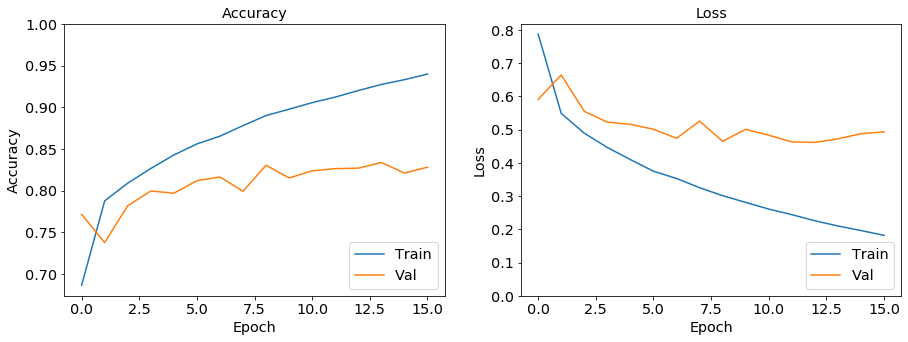

Classification Report ...
{'Bald': {'precision': 0.770048309178744, 'recall': 0.8865406006674083, 'f1-score': 0.8241985522233712, 'support': 899}, 'Black_Hair': {'precision': 0.879746835443038, 'recall': 0.7782754759238522, 'f1-score': 0.8259061200237671, 'support': 893}, 'Blond_Hair': {'precision': 0.8812785388127854, 'recall': 0.8625698324022346, 'f1-score': 0.8718238283455675, 'support': 895}, 'Brown_Hair': {'precision': 0.759493670886076, 'recall': 0.8035714285714286, 'f1-score': 0.7809110629067246, 'support': 896}, 'Gray_Hair': {'precision': 0.7484957882069796, 'recall': 0.693422519509476, 'f1-score': 0.7199074074074074, 'support': 897}, 'accuracy': 0.8049107142857143, 'macro avg': {'precision': 0.8078126285055246, 'recall': 0.8048759714148801, 'f1-score': 0.8045493941813676, 'support': 4480}, 'weighted avg': {'precision': 0.807709530664141, 'recall': 0.8049107142857143, 'f1-score': 0.8045143408053991, 'support': 4480}}


In [13]:
# plot
top = min(len(test['label']), len(y_pred))
metrics = Metrics(history, epoch, test['label'][:top].tolist(), y_pred[:top], model_name, label_name)
metrics.confusion_matrix()
metrics.acc_loss_graph()
metrics.classification_report()

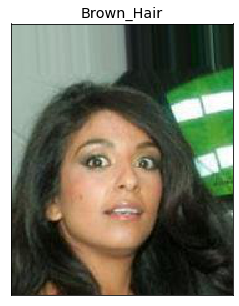

In [14]:
labels_hair = {'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}
Prediction.predict_label_multi(model, labels_hair, '/home/ubuntu/sheryl/face_att_sheryl/face_att_018217.jpg', 'ResNet50')

In [17]:
from sklearn.metrics import classification_report
top = min(len(test['label']), len(y_pred))
print(classification_report(test['label'][:top].tolist(), y_pred[:top]))

              precision    recall  f1-score   support

        Bald       0.77      0.89      0.82       899
  Black_Hair       0.88      0.78      0.83       893
  Blond_Hair       0.88      0.86      0.87       895
  Brown_Hair       0.76      0.80      0.78       896
   Gray_Hair       0.75      0.69      0.72       897

    accuracy                           0.80      4480
   macro avg       0.81      0.80      0.80      4480
weighted avg       0.81      0.80      0.80      4480

